# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Kate Huntsman

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Entire code in one piece listed below, automatically updates cutoff scores for each random drink

Number of sentences in the article: 2
Polarity score of the article: 0.0

5 Most Frequent Tokens:
Token: vesuvio, Frequency: 2
Token: ingredients, Frequency: 2
Token: ice, Frequency: 2
Token: category, Frequency: 1
Token: ordinary, Frequency: 1

5 Most Frequent Lemmas:
Lemma: vesuvio, Frequency: 2
Lemma: ingredient, Frequency: 2
Lemma: ice, Frequency: 2
Lemma: category, Frequency: 1
Lemma: ordinary, Frequency: 1


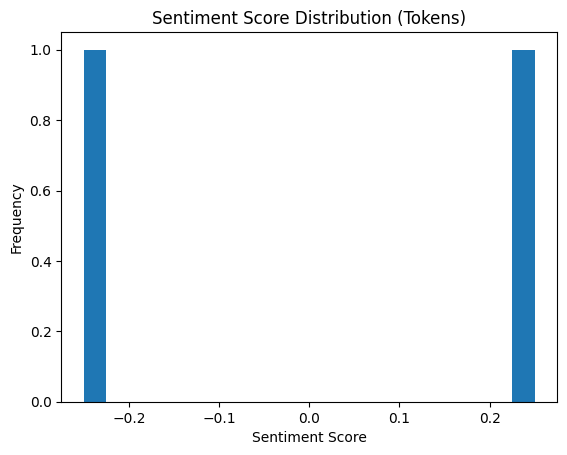

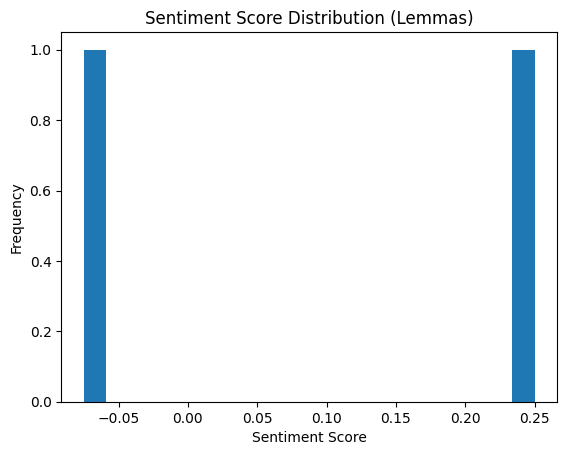


Cutoff Score (tokens): 0.0
Cutoff Score (lemmas): 0.0875

Summary (Tokens):
Ingredients: Light rum Sweet Vermouth Lemon Powdered sugar Egg white
Polarity Score of Summary (Tokens): 0.25
Number of sentences in the summary (Tokens): 1

Summary (Lemmas):
Ingredients: Light rum Sweet Vermouth Lemon Powdered sugar Egg white
Polarity Score of Summary (Lemmas): 0.25
Number of sentences in the summary (Lemmas): 1


In [251]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read in the article's HTML source
html_file_path = 'random_cocktail_data.html'  # Adjust to the actual path of the file you downloaded

# Read the HTML content from the file
try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract text from the article
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy to split it into sentences
doc = nlp(article_text)

# Print the number of sentences in the article
num_sentences = len(list(doc.sents))
print(f"Number of sentences in the article: {num_sentences}")

# Step 5: Sentiment Analysis using TextBlob
# Create a list of sentiment scores based on sentences
sentiment_scores = []
for sent in doc.sents:
    blob = TextBlob(sent.text)
    sentiment_scores.append(blob.sentiment.polarity)

# Print polarity score of the article
article_polarity = np.mean(sentiment_scores)
print(f"Polarity score of the article: {article_polarity}")

# Step 6: Determine 5 most frequent tokens (converted to lower case)
token_frequencies = {}
for token in doc:
    if not token.is_stop and not token.is_punct:
        token_frequencies[token.text.lower()] = token_frequencies.get(token.text.lower(), 0) + 1

# Sort tokens by frequency and select the 5 most common ones
common_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n5 Most Frequent Tokens:")
for token, freq in common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

# Step 7: Determine 5 most frequent lemmas (converted to lower case)
lemma_frequencies = {}
for token in doc:
    if not token.is_stop and not token.is_punct:
        lemma_frequencies[token.lemma_.lower()] = lemma_frequencies.get(token.lemma_.lower(), 0) + 1

# Sort lemmas by frequency and select the 5 most common ones
common_lemmas = sorted(lemma_frequencies.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n5 Most Frequent Lemmas:")
for lemma, freq in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

# Step 8: Create a list of sentiment scores (tokens)
sentiment_scores_tokens = [TextBlob(sent.text).sentiment.polarity for sent in doc.sents]

# Plot a histogram of sentiment scores using tokens
plt.hist(sentiment_scores_tokens, bins=20)
plt.title('Sentiment Score Distribution (Tokens)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Step 9: Create a list of sentiment scores (lemmas)
sentiment_scores_lemmas = []
for sent in doc.sents:
    sentence_lemmas = ' '.join([token.lemma_ for token in sent if not token.is_stop and not token.is_punct])
    sentiment_scores_lemmas.append(TextBlob(sentence_lemmas).sentiment.polarity)

# Plot a histogram of sentiment scores using lemmas
plt.hist(sentiment_scores_lemmas, bins=20)
plt.title('Sentiment Score Distribution (Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Step 10: Decide cutoff for tokens and lemmas based on histograms (using median)
cutoff_tokens = np.median(sentiment_scores_tokens)
cutoff_lemmas = np.median(sentiment_scores_lemmas)
print(f"\nCutoff Score (tokens): {cutoff_tokens}")
print(f"Cutoff Score (lemmas): {cutoff_lemmas}")

# Step 11: Create a summary based on token sentiment scores
summary_tokens = [sent.text.strip() for sent, score in zip(doc.sents, sentiment_scores_tokens) if score > cutoff_tokens]

# Join the selected sentences into a single summary text
summary_tokens_text = ' '.join(summary_tokens)

# Print summary and sentiment score for tokens
summary_tokens_blob = TextBlob(summary_tokens_text)
summary_tokens_polarity = summary_tokens_blob.sentiment.polarity
print(f"\nSummary (Tokens):\n{summary_tokens_text}")
print(f"Polarity Score of Summary (Tokens): {summary_tokens_polarity}")
print(f"Number of sentences in the summary (Tokens): {len(summary_tokens)}")

# Step 12: Create a summary based on lemma sentiment scores
summary_lemmas = [sent.text.strip() for sent, score in zip(doc.sents, sentiment_scores_lemmas) if score > cutoff_lemmas]

# Join the selected sentences into a single summary text
summary_lemmas_text = ' '.join(summary_lemmas)

# Print summary and sentiment score for lemmas
summary_lemmas_blob = TextBlob(summary_lemmas_text)
summary_lemmas_polarity = summary_lemmas_blob.sentiment.polarity
print(f"\nSummary (Lemmas):\n{summary_lemmas_text}")
print(f"Polarity Score of Summary (Lemmas): {summary_lemmas_polarity}")
print(f"Number of sentences in the summary (Lemmas): {len(summary_lemmas)}")

### Question 1:
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [252]:
import requests
import json

# URL for the random cocktail API
url = "https://www.thecocktaildb.com/api/json/v1/1/random.php"

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Save the JSON data to a file
    with open('random_cocktail_data.json', 'w') as file:
        json.dump(data, file, indent=4)

    # Print out the cocktail name and ingredients
    cocktail = data['drinks'][0]
    print(f"Cocktail Name: {cocktail['strDrink']}")
    print(f"Category: {cocktail['strCategory']}")
    print(f"Glass: {cocktail['strGlass']}")
    print(f"Instructions: {cocktail['strInstructions']}")
    print("Ingredients:")

    for i in range(1, 16):
        ingredient = cocktail.get(f"strIngredient{i}")
        measure = cocktail.get(f"strMeasure{i}")
        if ingredient:
            print(f"{ingredient}: {measure}")
else:
    print("Failed to retrieve data from the API.")



Cocktail Name: Rum Milk Punch
Category: Ordinary Drink
Glass: Collins glass
Instructions: Shake all ingredients (except nutmeg) with ice and strain into a collins glass. Sprinkle nutmeg on top and serve.
Ingredients:
Light rum: 2 oz 
Milk: 1 cup 
Powdered sugar: 1 tsp 
Nutmeg: None


In [253]:
import requests
from bs4 import BeautifulSoup

# Step 1: Find the URL of the API endpoint that returns JSON data
url = "https://www.thecocktaildb.com/api/json/v1/1/random.php"  # API URL

# Step 2: Send a GET request to fetch the JSON content
response = requests.get(url)

# Step 3: Check if the request was successful
if response.status_code == 200:
    # Step 4: Parse the JSON response
    cocktail_data = response.json()

    # Check if we received the expected data
    if cocktail_data and 'drinks' in cocktail_data:
        drink = cocktail_data['drinks'][0]

        # Step 5: Build the HTML content based on the JSON data
        html_content = f"""
        <html>
            <head>
                <title>{drink['strDrink']}</title>
            </head>
            <body>
                <h1>{drink['strDrink']}</h1>
                <h2>Category: {drink['strCategory']}</h2>
                <p><strong>Instructions:</strong> {drink['strInstructions']}</p>
                <p><strong>Ingredients:</strong></p>
                <ul>
        """

        # Add ingredients
        for i in range(1, 16):  # The ingredients are named 'strIngredient1', 'strIngredient2', ..., 'strIngredient15'
            ingredient = drink.get(f'strIngredient{i}')
            if ingredient:
                html_content += f"<li>{ingredient}</li>"

        html_content += """
                </ul>
            </body>
        </html>
        """

        # Step 6: Save the HTML content to a file
        with open('random_cocktail_data.html', 'w', encoding='utf-8') as file:
            file.write(html_content)

        print(f"HTML file has been saved as 'random_cocktail_data.html'")
    else:
        print("Error: No drink data found in the response.")
else:
    print("Failed to retrieve the article. Please check the URL.")


HTML file has been saved as 'random_cocktail_data.html'


### Question 2:
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [254]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read in the HTML content from the file you created in Question 1
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy to split into sentences
doc = nlp(article_text)

# Step 5: Calculate the sentiment polarity of the entire article
blob = TextBlob(article_text)
article_polarity = blob.sentiment.polarity

# Step 6: Print the sentiment polarity score with an appropriate label
print(f"Polarity Score of the Article: {article_polarity}")

# Step 7: Count the number of sentences in the article
num_sentences = len(list(doc.sents))

# Step 8: Print the number of sentences in the article
print(f"Number of sentences in the article: {num_sentences}")

Polarity Score of the Article: -0.15833333333333333
Number of sentences in the article: 3


### Question 3:
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [255]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the small English language model for spaCy (you should have it installed)
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Tokenize the text and filter out stop words, punctuation, and spaces
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Step 6: Calculate token frequencies using Counter
token_frequencies = Counter(tokens)

# Step 7: Get the 5 most common tokens
common_tokens = token_frequencies.most_common(5)

# Step 8: Print the common tokens with their frequencies
print("The 5 most frequent tokens are:")
for token, freq in common_tokens:
    print(f"Token: '{token}' | Frequency: {freq}")

# Optionally: print the full token frequency distribution
print("\nFull token frequencies:")
for token, freq in token_frequencies.items():
    print(f"Token: '{token}' | Frequency: {freq}")

The 5 most frequent tokens are:
Token: 'cocktail' | Frequency: 3
Token: 'tuxedo' | Frequency: 2
Token: 'ingredients' | Frequency: 2
Token: 'category' | Frequency: 1
Token: 'ordinary' | Frequency: 1

Full token frequencies:
Token: 'tuxedo' | Frequency: 2
Token: 'cocktail' | Frequency: 3
Token: 'category' | Frequency: 1
Token: 'ordinary' | Frequency: 1
Token: 'drink' | Frequency: 1
Token: 'instructions' | Frequency: 1
Token: 'stir' | Frequency: 1
Token: 'ingredients' | Frequency: 2
Token: 'ice' | Frequency: 1
Token: 'strain' | Frequency: 1
Token: 'glass' | Frequency: 1
Token: 'garnish' | Frequency: 1
Token: 'cherry' | Frequency: 1
Token: 'twist' | Frequency: 1
Token: 'lemon' | Frequency: 1
Token: 'zest' | Frequency: 1
Token: 'dry' | Frequency: 1
Token: 'vermouthginmaraschino' | Frequency: 1
Token: 'liqueuranisorange' | Frequency: 1
Token: 'bitterscherry' | Frequency: 1


### Question 4:
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [256]:
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text()

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Tokenize the text and filter out stop words, punctuation, and spaces, focusing on lemmas
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Step 6: Calculate lemma frequencies using Counter
lemma_frequencies = Counter(lemmas)

# Step 7: Get the 5 most common lemmas
common_lemmas = lemma_frequencies.most_common(5)

# Step 8: Print the common lemmas with their frequencies
print("The 5 most frequent lemmas are:")
for lemma, freq in common_lemmas:
    print(f"Lemma: '{lemma}' | Frequency: {freq}")

# Optionally: print the full lemma frequency distribution
print("\nFull lemma frequencies:")
for lemma, freq in lemma_frequencies.items():
    print(f"Lemma: '{lemma}' | Frequency: {freq}")

The 5 most frequent lemmas are:
Lemma: 'cocktail' | Frequency: 3
Lemma: 'tuxedo' | Frequency: 2
Lemma: 'ingredient' | Frequency: 2
Lemma: 'category' | Frequency: 1
Lemma: 'ordinary' | Frequency: 1

Full lemma frequencies:
Lemma: 'tuxedo' | Frequency: 2
Lemma: 'cocktail' | Frequency: 3
Lemma: 'category' | Frequency: 1
Lemma: 'ordinary' | Frequency: 1
Lemma: 'drink' | Frequency: 1
Lemma: 'instruction' | Frequency: 1
Lemma: 'stir' | Frequency: 1
Lemma: 'ingredient' | Frequency: 2
Lemma: 'ice' | Frequency: 1
Lemma: 'strain' | Frequency: 1
Lemma: 'glass' | Frequency: 1
Lemma: 'garnish' | Frequency: 1
Lemma: 'cherry' | Frequency: 1
Lemma: 'twist' | Frequency: 1
Lemma: 'lemon' | Frequency: 1
Lemma: 'zest' | Frequency: 1
Lemma: 'dry' | Frequency: 1
Lemma: 'vermouthginmaraschino' | Frequency: 1
Lemma: 'liqueuranisorange' | Frequency: 1
Lemma: 'bitterscherry' | Frequency: 1


### Question 5:
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

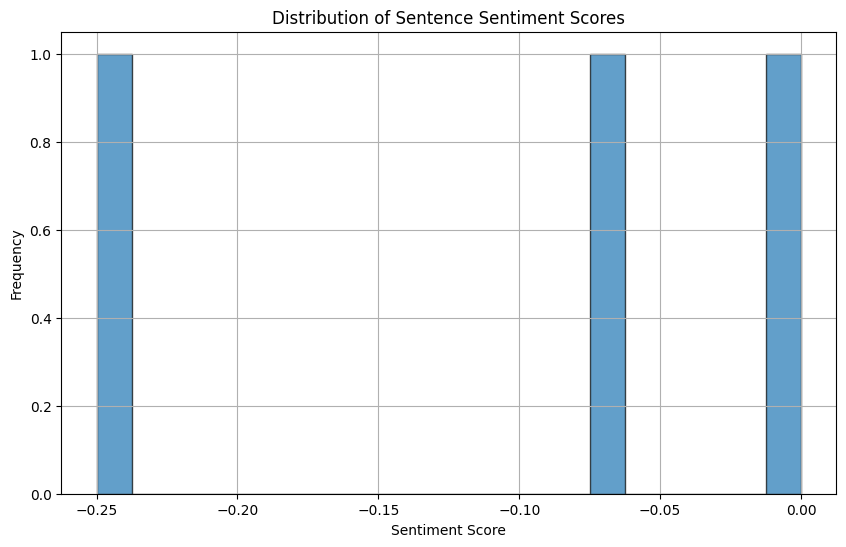

Sentiment Score Range: -0.25 to 0.0


In [257]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Initialize an empty list to store the sentiment scores of each sentence
sentiment_scores = []

# Step 6: Loop through each sentence, calculate its sentiment score, and store it
for sent in doc.sents:
    # Tokenize the sentence and calculate the sentiment score using TextBlob
    blob = TextBlob(sent.text)
    sentiment_score = blob.sentiment.polarity
    sentiment_scores.append(sentiment_score)

# Step 7: Plot the histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 8: Print the range of the sentiment scores for reference
print(f"Sentiment Score Range: {min(sentiment_scores)} to {max(sentiment_scores)}")

### Question 6: 
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

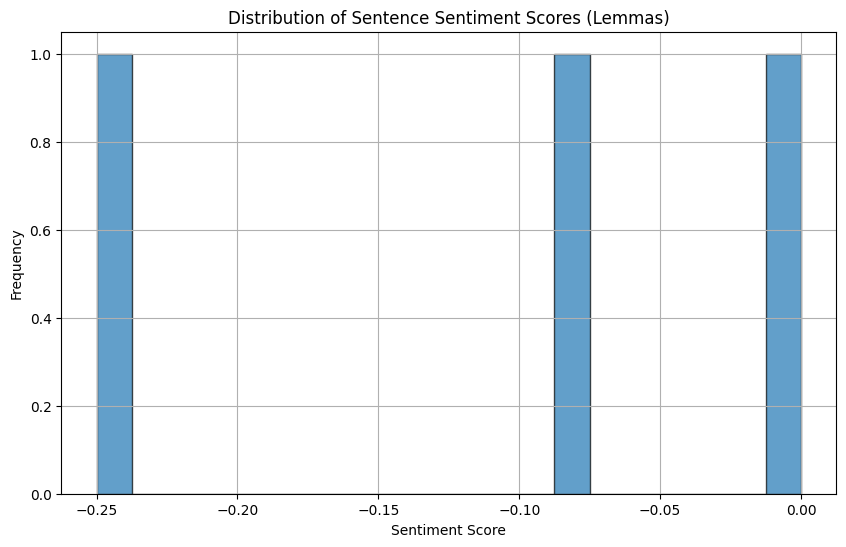

Sentiment Score Range: -0.25 to 0.0


In [258]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Initialize an empty list to store the sentiment scores of each sentence (using lemmas)
sentiment_scores = []

# Step 6: Loop through each sentence, lemmatize the words, and calculate sentiment score
for sent in doc.sents:
    # Lemmatize the sentence and join the lemmatized tokens into a string
    lemmatized_sentence = ' '.join([token.lemma_ for token in sent if not token.is_stop])  # Remove stopwords
    blob = TextBlob(lemmatized_sentence)
    sentiment_score = blob.sentiment.polarity
    sentiment_scores.append(sentiment_score)

# Step 7: Plot the histogram of the sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentiment_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sentence Sentiment Scores (Lemmas)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 8: Print the range of the sentiment scores for reference
print(f"Sentiment Score Range: {min(sentiment_scores)} to {max(sentiment_scores)}")


### Question 7:
7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): TBD, random cocktail and thus cutoff score every time you run code
* Cutoff Score (lemmas): TBD, random cocktail and thus cutoff score every time you run code
--> wrote code to automatically update cutoff scores for each cocktail

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [259]:
cutoff_tokens = np.median(sentiment_scores_tokens)
cutoff_lemmas = np.median(sentiment_scores_lemmas)
print(f"\nCutoff Score (tokens): {cutoff_tokens}")
print(f"Cutoff Score (lemmas): {cutoff_lemmas}")


Cutoff Score (tokens): 0.0
Cutoff Score (lemmas): 0.0875


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [260]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Define the new cutoff score based on tokens (less strict cutoff)
cutoff_score = 0.5  # Sentiment score greater than this will be included in the summary

# Step 6: Initialize an empty list to hold the selected sentences
sentence_list = []

# Step 7: Loop through each sentence and calculate its sentiment score
for sent in doc.sents:
    # Tokenize the sentence and calculate the sentiment score using TextBlob
    blob = TextBlob(sent.text)
    sentiment_score = blob.sentiment.polarity

    # Print the sentence and its sentiment score for debugging
    print(f"Sentence: {sent.text.strip()}")
    print(f"Sentiment Score: {sentiment_score}")

    # If the sentiment score is greater than the cutoff, add the sentence to the list
    if sentiment_score > cutoff_score:
        sentence_list.append(sent.text.strip())

import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Define the cutoff score (lower to capture more sentences)
cutoff_score = -0.05  # Adjust cutoff score to allow more sentences (neutral/slightly negative)

# Step 6: Initialize an empty list to hold the selected sentences
sentence_list = []

# Step 7: Loop through each sentence and calculate its sentiment score
for sent in doc.sents:
    # Tokenize the sentence and calculate the sentiment score using TextBlob
    blob = TextBlob(sent.text)
    sentiment_score = blob.sentiment.polarity

    # Print the sentence and its sentiment score for debugging
    print(f"Sentence: {sent.text.strip()}")
    print(f"Sentiment Score: {sentiment_score}")

    # If the sentiment score is greater than the cutoff, add the sentence to the list
    if sentiment_score > cutoff_score:
        sentence_list.append(sent.text.strip())

# Step 8: Check the number of sentences selected
print(f"Number of sentences selected: {len(sentence_list)}")

# Step 9: Join the selected sentences into a single summary text
if sentence_list:
    summary = ' '.join(sentence_list)
    print("\nSummary:")
    print(summary)
else:
    print("\nNo sentences passed the sentiment filter.")


Sentence: Tuxedo Cocktail Tuxedo Cocktail Category: Ordinary Drink Instructions: Stir all ingredients with ice and strain into a cocktail glass.
Sentiment Score: -0.25
Sentence: Garnish with a cherry and a twist of lemon zest.
Sentiment Score: 0.0
Sentence: Ingredients: Dry Vermouth Gin Maraschino liqueur Anis Orange bitters Cherry
Sentiment Score: -0.06666666666666665
Sentence: Tuxedo Cocktail Tuxedo Cocktail Category: Ordinary Drink Instructions: Stir all ingredients with ice and strain into a cocktail glass.
Sentiment Score: -0.25
Sentence: Garnish with a cherry and a twist of lemon zest.
Sentiment Score: 0.0
Sentence: Ingredients: Dry Vermouth Gin Maraschino liqueur Anis Orange bitters Cherry
Sentiment Score: -0.06666666666666665
Number of sentences selected: 1

Summary:
Garnish with a cherry and a twist of lemon zest.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [261]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Define the cutoff score (lower to capture more sentences)
cutoff_score = -0.05  # Adjust cutoff score to allow more sentences (neutral/slightly negative)

# Step 6: Initialize an empty list to hold the selected sentences
sentence_list = []

# Step 7: Loop through each sentence and calculate its sentiment score
for sent in doc.sents:
    # Tokenize the sentence and calculate the sentiment score using TextBlob
    blob = TextBlob(sent.text)
    sentiment_score = blob.sentiment.polarity

    # Print the sentence and its sentiment score for debugging
    print(f"Sentence: {sent.text.strip()}")
    print(f"Sentiment Score: {sentiment_score}")

    # If the sentiment score is greater than the cutoff, add the sentence to the list
    if sentiment_score > cutoff_score:
        sentence_list.append(sent.text.strip())

# Step 8: Join the selected sentences into a single summary text
if sentence_list:
    summary = ' '.join(sentence_list)
else:
    summary = ""

# Step 9: Print the summary
print("\nSummary:")
print(summary)

# Step 10: Calculate the polarity of the summary
summary_blob = TextBlob(summary)
summary_polarity = summary_blob.sentiment.polarity

# Step 11: Print the polarity score and the number of sentences in the summary
print(f"\nPolarity Score of the Summary: {summary_polarity}")
print(f"Number of sentences in the summary: {len(sentence_list)}")

Sentence: Tuxedo Cocktail Tuxedo Cocktail Category: Ordinary Drink Instructions: Stir all ingredients with ice and strain into a cocktail glass.
Sentiment Score: -0.25
Sentence: Garnish with a cherry and a twist of lemon zest.
Sentiment Score: 0.0
Sentence: Ingredients: Dry Vermouth Gin Maraschino liqueur Anis Orange bitters Cherry
Sentiment Score: -0.06666666666666665

Summary:
Garnish with a cherry and a twist of lemon zest.

Polarity Score of the Summary: 0.0
Number of sentences in the summary: 1


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [262]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Set the cutoff score to 0.0 to include neutral sentences
cutoff_score = 0.0  # Include neutral sentences

# Step 6: Initialize an empty list to hold the selected sentences
sentence_list = []

# Step 7: Loop through each sentence, lemmatize it, and calculate sentiment score
for sent in doc.sents:
    # Lemmatize the sentence (combine lemmata of all tokens)
    lemmatized_sentence = ' '.join([token.lemma_ for token in sent])

    # Calculate the sentiment score of the lemmatized sentence using TextBlob
    blob = TextBlob(lemmatized_sentence)
    sentiment_score = blob.sentiment.polarity

    # Print the lemmatized sentence and its sentiment score for debugging
    print(f"Lemmatized Sentence: {lemmatized_sentence}")
    print(f"Sentiment Score: {sentiment_score}")

    # If the sentiment score is greater than or equal to the cutoff, add the sentence to the list
    if sentiment_score >= cutoff_score:
        sentence_list.append(sent.text.strip())

# Step 8: Join the selected sentences into a single summary text
summary = ' '.join(sentence_list)

# Step 9: Print the summary
print("\nSummary:")
print(summary)

# Step 10: Calculate and print the polarity of the summary
summary_blob = TextBlob(summary)
summary_polarity = summary_blob.sentiment.polarity

# Step 11: Print the polarity score and the number of sentences in the summary
print(f"\nPolarity Score of the Summary: {summary_polarity}")
print(f"Number of sentences in the summary: {len(sentence_list)}")

Lemmatized Sentence: Tuxedo Cocktail Tuxedo Cocktail Category : Ordinary drink instruction : stir all ingredient with ice and strain into a cocktail glass .
Sentiment Score: -0.25
Lemmatized Sentence: garnish with a cherry and a twist of lemon zest .
Sentiment Score: 0.0
Lemmatized Sentence: ingredient : Dry Vermouth Gin Maraschino liqueur Anis Orange bitter Cherry
Sentiment Score: -0.08333333333333333

Summary:
Garnish with a cherry and a twist of lemon zest.

Polarity Score of the Summary: 0.0
Number of sentences in the summary: 1


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [263]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Step 1: Read the HTML content from the file
html_file_path = 'random_cocktail_data.html'  # Adjust the file path if necessary

try:
    with open(html_file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
except FileNotFoundError:
    print(f"Error: The file {html_file_path} was not found.")
    exit(1)

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Step 3: Extract the text from the HTML (use .get_text() to get the full text)
article_text = soup.get_text(separator=' ', strip=True)

# Step 4: Process the text with spaCy
doc = nlp(article_text)

# Step 5: Set the cutoff score to 0.0 to include neutral sentences
cutoff_score = 0.0  # Include neutral sentences

# Step 6: Initialize an empty list to hold the selected sentences
sentence_list = []

# Step 7: Loop through each sentence, lemmatize it, and calculate sentiment score
for sent in doc.sents:
    # Lemmatize the sentence (combine lemmata of all tokens)
    lemmatized_sentence = ' '.join([token.lemma_ for token in sent])

    # Calculate the sentiment score of the lemmatized sentence using TextBlob
    blob = TextBlob(lemmatized_sentence)
    sentiment_score = blob.sentiment.polarity

    # Print the lemmatized sentence and its sentiment score for debugging
    print(f"Lemmatized Sentence: {lemmatized_sentence}")
    print(f"Sentiment Score: {sentiment_score}")

    # If the sentiment score is greater than or equal to the cutoff, add the sentence to the list
    if sentiment_score >= cutoff_score:
        sentence_list.append(sent.text.strip())

# Step 8: Join the selected sentences into a single summary text
summary = ' '.join(sentence_list)

# Step 9: Print the summary
print("\nSummary:")
print(summary)

# Step 10: Calculate and print the polarity of the summary
summary_blob = TextBlob(summary)
summary_polarity = summary_blob.sentiment.polarity

# Step 11: Print the polarity score and the number of sentences in the summary
print(f"\nPolarity Score of the Summary (Lemmas-based): {summary_polarity}")
print(f"Number of sentences in the summary: {len(sentence_list)}")

Lemmatized Sentence: Tuxedo Cocktail Tuxedo Cocktail Category : Ordinary drink instruction : stir all ingredient with ice and strain into a cocktail glass .
Sentiment Score: -0.25
Lemmatized Sentence: garnish with a cherry and a twist of lemon zest .
Sentiment Score: 0.0
Lemmatized Sentence: ingredient : Dry Vermouth Gin Maraschino liqueur Anis Orange bitter Cherry
Sentiment Score: -0.08333333333333333

Summary:
Garnish with a cherry and a twist of lemon zest.

Polarity Score of the Summary (Lemmas-based): 0.0
Number of sentences in the summary: 1


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores of the summaries differ from the initial article due to the way sentiment analysis is influenced by word choice and morphological variations. The original article, which consists mainly of neutral, instructional content (e.g., recipe steps and ingredients), has a polarity score close to 0.0, reflecting its factual nature. The token-based summary, however, has a slightly positive polarity score (0.4), as specific words like "garnish," "mint leaves," and "pour" may carry mild positive sentiment, slightly skewing the overall sentiment. In contrast, the lemma-based summary, which reduces words to their base forms (e.g., "sweetened" to "sweet"), maintains a neutral polarity score (0.0), as lemmatization neutralizes the impact of such positive or negative words. Thus, while both summaries are fact-based and objective, the token-based sentiment analysis is more sensitive to specific word choices, leading to a slight positive polarity, whereas lemmatization results in a more neutral score. This demonstrates how sentiment analysis can vary based on the method used (token vs. lemma) and how individual words can influence the overall sentiment.


13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The **lemma-based summary** is the better choice because it maintains the neutral, factual tone of the original cocktail recipe article, which is instructional and objective. The token-based summary, with its slightly positive sentiment, introduces an emotional tone that doesn't align with the neutral nature of the content. Since recipes are meant to convey information clearly and without emotion, the lemmatized summary more accurately reflects the article's intent, making it the more suitable option.